# Data Visualization Tests

This file is to help plot the data, and discover trends

## Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import MAGAN

2024-05-07 17:58:09.261031: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


MAGAN is running on TensorFlow 2.16.1


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory()

True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms("winequality-red.csv", split = "random", percent_of_anchors = [0.1], random_state=186, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)



 
 
---------------------------       Initalizing class with winequality-red.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (1599, 6)
Split B Features shape (1599, 5)
MDS initialized with 5 components
The knn values are: (2, 34, 66, 98, 130, 162, 194, 226, 258, 290)

-------------------------------------    SPUD Tests winequality-red   -------------------------------------

Operation average
    Kind distance
        KNN 2
            Percent of Anchors 0.1
                FOSCTTM Score: 0.35937173053358473
                Unable to calculate Cross Embedding
        KNN 34
            Percent of Anchors 0.1


In [3]:
"""Testing All functions"""
class_instances = tma.run_all_tests(csv_files = ["iris.csv"], test_random = 3, #General function arguments
                                split = "random", verbose = 2, percent_of_anchors = [0.05, 0.1], #Init Key arguments
                                run_DIG = False, page_ranks = ("None", "off-diagonal", "full"), predict = True, #DIG key arguments
                                run_DTA = False,
                                run_NAMA = False,
                                run_SSMA = False,
                                run_SPUD = True, operations = ("average", "abs"), kind = ["distance"]) #SPUD key arguments | SPUDS_Algorithm


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 1)
Split B Features shape (150, 3)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------    SPUD Tests iris   -------------------------------------

Operation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We do not have available the needed predict values


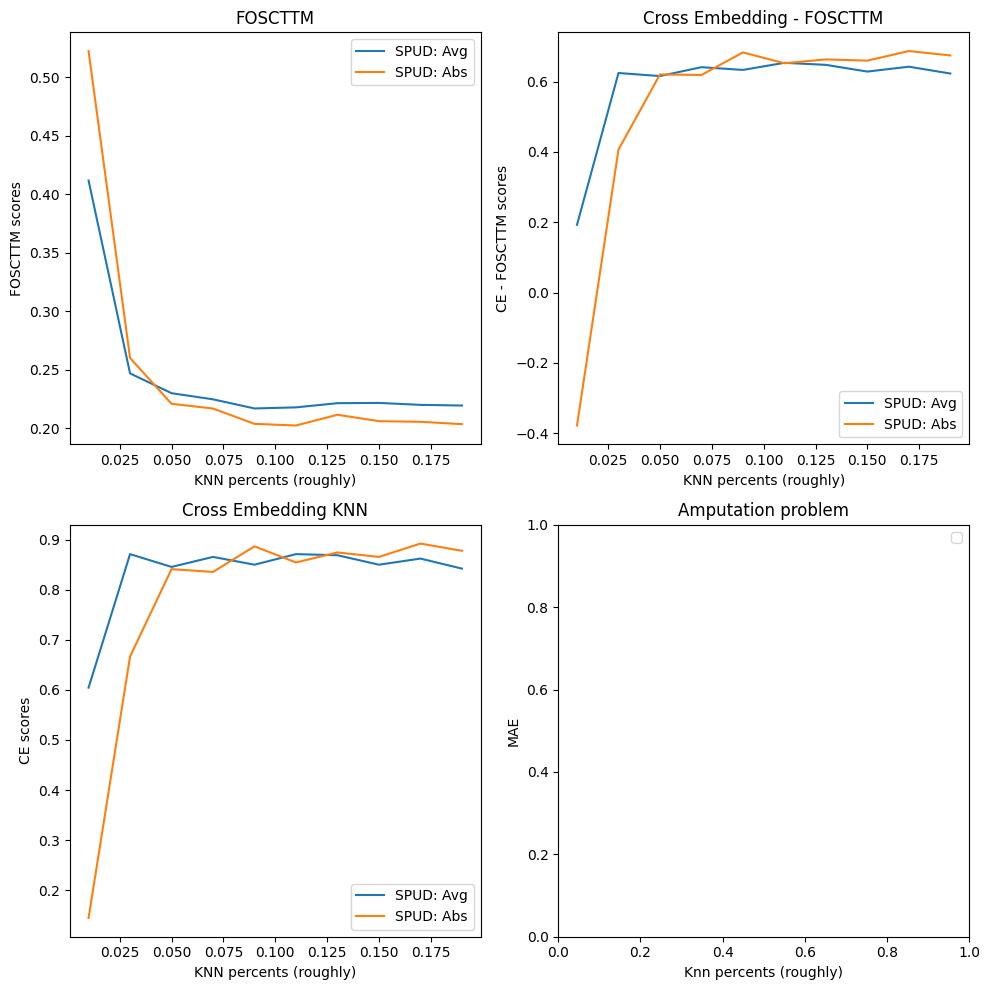

In [4]:
"""Visualization"""
#Veiwing with MatplotLib
tma.visualize_results(file_names = 'all')

In [5]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_Anchors',
       'FOSCTTM', 'Cross_Embedding_KNN', 'Page_Rank', 'Predicted_Feature_MAE',
       'Operation', 'SPUDS_Algorithm'],
      dtype='object')

In [8]:
df.groupby(['csv_file', 'method'])[['FOSCTTM', "Cross_Embedding_KNN"]].mean()

,,FOSCTTM,Cross_Embedding_KNN
csv_file,method,,
iris,SPUD,0.309136,0.657333


In [9]:
#These are all DIG Methods
df.groupby(['csv_file', "Page_Rank"])[['FOSCTTM', "Cross_Embedding_KNN", "Predicted_Feature_MAE"]].mean()

,,FOSCTTM,Cross_Embedding_KNN,Predicted_Feature_MAE
csv_file,Page_Rank,,,


In [7]:
#These are all SPUD Methods // With Pure
df.groupby(['csv_file', "Operation", "SPUDS_Algorithm"])[['FOSCTTM', "Cross_Embedding_KNN"]].mean()

FOSCTTM  Cross_Embedding_KNN
csv_file Operation Percent_of_Anchors                               
iris     abs       0.05                0.254332             0.742667
                   0.1                 0.236447             0.805111
         average   0.05                0.273342             0.803111
                   0.1                 0.212973             0.863111

# Debugging Tests Below

In [2]:
iris_tma = tma.test_manifold_algorithms("iris.csv", split = "even", percent_of_anchors= [0.1], verbose = 2)


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [4]:
import tensorflow as tf

In [8]:
help(tf.compat.v1)

Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.
Help on package tensorflow.compat.v1 in tensorflow.compat:

NAME
    tensorflow.compat.v1 - Bring in all of the public TensorFlow interface into this module.

PACKAGE CONTENTS
    __internal__ (package)
    app (package)
    audio (package)
    autograph (package)
    bitwise (package)
    compat (package)
    config (package)
    data (package)
    debugging (package)
    distribute (package)
    distributions (package)
    dtypes (package)
    errors (package)
    experimental (package)
    feature_column (package)
    gfile (package)
    graph_util (package)
    image (package)
    initializers (package)
    io (package)
    layers (package)
    linalg (package)
    lite (package)
    logging (package)
    lookup (package)
    losses (package)
    manip (package)
    math (package)
    metrics (package)
    mixed_precision (package)
    mlir (package)
    nest (package)
    nn (package)
    profiler (package)
  

Batch 1 shape: (150, 2) Batch 2 shape: (150, 2)


2024-05-07 17:58:15.953345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Losses: D G 0.000 6.361


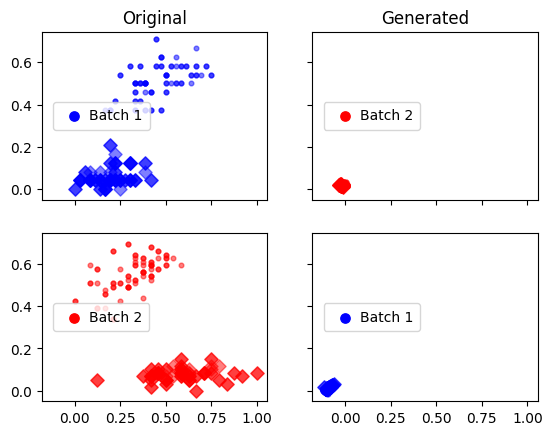

Losses: D G 0.000 7.063


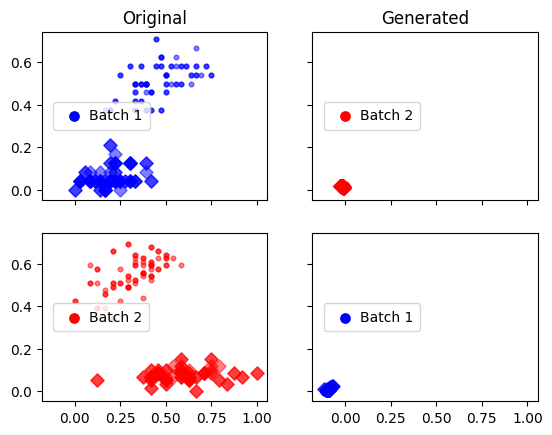

Losses: D G 0.000 7.456


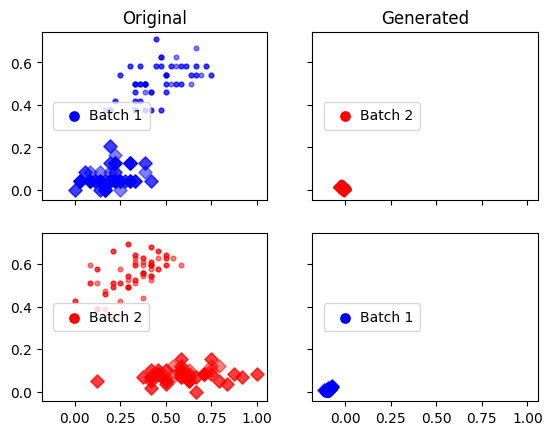

Losses: D G 0.000 7.813


KeyboardInterrupt: 

In [3]:
MAGAN.run_MAGAN(iris_tma.split_A, iris_tma.split_B, labels1 = iris_tma.labels)